# Introduction

The data for this project comes from the OkCupid app. This is an online dating service, where users enter basic information about themselves and answer several multiple choice questions so that they can be matched to other users.

The goal of this project is to first review and clean the data, determine what data is available, and create a machine learning model to attempt matching users.

The data is provided from OkCupid and Codecademy as `profiles.csv`.

# Project Scoping

The next sections describe the project scope and are to be used to guide the process.

### Project Goals

Take existing data from the OkCupid app and create a machine learning model to make predictions about users. In the real world, machine learning will make multiple predictions of each user's compatibility with other users and suggest matches. In this case, the specific goal is to see if a machine learning model can correctly predict a user's religious belief based on all other data. 

### Data

Data from OkCupid is provided in `profiles.csv`. The sections below go into more detail about the data: the number of users and their responses to multiple choice and short answer questions.

### Analysis

The analysis will include visualizations of the data, distribution and counts of variables, and relationships between variables. Then a model will be created using classification algorithms and supervised machine learning to predict a user's religiuos belief.

### Evaluation

THe model will then be evaluated with a validation data set, and predictions checked using a confusion matrix, and accuracy, precision, recall, F1, and Kappa.







## Import Python Modules 

Includes initial modules expected to be utilized.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from decimal import Decimal


## Load Data and Review 

Data from `profiles.csv` read into a dataframe called `profiles`. Then initial data reviewed using `.head()`. 

In [3]:
profiles = pd.read_csv('profiles.csv', encoding='utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
profiles.shape

(59946, 31)

In [5]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [6]:
profiles.age.dtypes

dtype('int64')

### Data Summary

From `profiles.shape` there are almost 60k rows (i.e. unique users) with 31 columns. 

The dataset column titles from `profiles.columns` are:

- **age:** continuous variable in years (int64)
- **body_type:** categorical variable 
- **diet:** categorical variable
- **drinks:** categorical variable (alcohol consumption)
- **drugs:** categorical variable (drug usage)
- **education:** categorical variable

- **essay0:** "My self summary"
- **essay1:** "What I'm doing with my life"
- **essay2:** "What I'm really good at"
- **essay3:** "The first thing people notice about me"
- **essay4:** "Favorite books, movies, shows, music, and food"
- **essay5:** "The six things I could never do without"
- **essay6:** "I spend a lot of time thinking about..."
- **essay7:** "On a typical Friday night I am..."
- **essay8:** "The most private thing I am willing to admit"
- **essay9:** "You should message me if..."

- **ethnicity:** categorical variable
- **height:** continuous variable in inches (float64)
- **income:** continuous variable in USD assumed (int64)
- **job:** categorical variable (by inspection, from dropdown menu) 
- **last_online:** categorical variable
- **location:** categorical variable
- **offspring:** categorical variable
- **orientation:** categorical variable
- **pets:** categorical variable
- **religion:** categorical variable
- **sex:** categorical variable
- **sign:** categorical variable
- **smokes:** categorical variable
- **speaks:** categorical variable
- **status:** categorical variable


## Explore the data

For all columns with continuous variables, explore the number of unique responses and in some cases list those. A method is provided here to give data on all column at once. It will alphabetize the list when sorting (removing NaN first...)

In [7]:
object_cols = []
for column in profiles.columns:
    if profiles[column].dtypes == 'object':
        object_cols.append(column)
        print(f'Column {column.upper()} has {profiles[column].nunique()} categories')   
        

Column BODY_TYPE has 12 categories
Column DIET has 18 categories
Column DRINKS has 6 categories
Column DRUGS has 3 categories
Column EDUCATION has 32 categories
Column ESSAY0 has 54350 categories
Column ESSAY1 has 51516 categories
Column ESSAY2 has 48635 categories
Column ESSAY3 has 43533 categories
Column ESSAY4 has 49260 categories
Column ESSAY5 has 48963 categories
Column ESSAY6 has 43603 categories
Column ESSAY7 has 45554 categories
Column ESSAY8 has 39324 categories
Column ESSAY9 has 45443 categories
Column ETHNICITY has 217 categories
Column JOB has 21 categories
Column LAST_ONLINE has 30123 categories
Column LOCATION has 199 categories
Column OFFSPRING has 15 categories
Column ORIENTATION has 3 categories
Column PETS has 15 categories
Column RELIGION has 45 categories
Column SEX has 2 categories
Column SIGN has 48 categories
Column SMOKES has 5 categories
Column SPEAKS has 7647 categories
Column STATUS has 5 categories


Next, a method is provided to permit review of unique responses for each column invidually. This will give an idea of the scope of data, which variables need to be cleaned and/or regrouped to suit the project requirements, etc.

In [8]:
def unique_entries(column):
    len_pre_nan = profiles[column].isnull().sum()
    clean_column = profiles[column].dropna()
    len_post = len(clean_column)
    col_entries = list(clean_column.unique())
    print(f'For column {column.upper()}, {len_post} entries remain after {len_pre_nan} NaNs deleted.')
    print(sorted(col_entries))

    
def unique_list(column):
    clean_column = profiles[column].dropna()
    col_entries = list(clean_column.unique())
    return col_entries


In [9]:
# unique_entries('body_type')

In [10]:
# unique_entries('diet')

In [11]:
# unique_entries('drinks')

In [12]:
# unique_entries('drugs')

In [13]:
unique_entries('ethnicity')

For column ETHNICITY, 54266 entries remain after 5680 NaNs deleted.
['asian', 'asian, black', 'asian, black, hispanic / latin', 'asian, black, hispanic / latin, other', 'asian, black, hispanic / latin, white', 'asian, black, hispanic / latin, white, other', 'asian, black, indian', 'asian, black, indian, hispanic / latin, other', 'asian, black, native american', 'asian, black, native american, hispanic / latin', 'asian, black, native american, hispanic / latin, white', 'asian, black, native american, indian', 'asian, black, native american, indian, hispanic / latin, white, other', 'asian, black, native american, indian, pacific islander, hispanic / latin', 'asian, black, native american, indian, pacific islander, white', 'asian, black, native american, other', 'asian, black, native american, pacific islander', 'asian, black, native american, pacific islander, other', 'asian, black, native american, pacific islander, white', 'asian, black, native american, pacific islander, white, other'

In [14]:
# unique_entries('education')

In [15]:
# unique_entries('job')

In [16]:
# unique_entries('location')

In [17]:
# unique_entries('offspring')

In [18]:
# unique_entries('pets')

In [19]:
# unique_enatries('sex')

In [20]:
# unique_entries('religion')

In [21]:
# unique_entries('sign')

In [22]:
# unique_entries('speaks')

## Preliminary Observations of Data

- Many columns such as `ethnicity`, `location`, `religion`, `sign` and `speaks` include large amounts of data that can be regrouped for clarity. Using a Bag of Words counter, it may be seen that in each of these cases terms are being repeated.
- The column for `location` may be split into city and state/country. A casual look at the data seems to indicate that there is a huge proportion of users from California. 


# Exploration of Variables in More Detail

### Religion, Drugs, Drinks, and Smokes 

These four variables will be explored together, culminating in a Chi Square test to explore preliminary relationsips.

#### Chi-Square Test

Analysis of significant association between variables.
 
- **Goal** Analysis of whether there is a relationship between how religious one describes oneself and self-described drug use and drinking.
- **Data** The data tables include the `religion`, `drugs`, `drinks`, and `smokes` columns.  
- **Process** The `religion` column will be divided into more strongly affiliated and less strongly affiliated with a belief.  The `drugs`, `drinks`, and `smokes` columns will be ordered and cleaned.
   - For religion: the new column will be `beliefs`. The entries '...and very serious about it', '...and somewhat serious about it', and the belief itself are to be categorized as 'strong belief'. Otherwise, the entries '...and not too serious about it', '...and laughing about it' are to be categorized as 'low belief'. 

In [23]:
# Drop null values from the following columns
profiles_rel = profiles.dropna(subset=['religion', 'drinks', 'drugs', 'smokes']).copy()
print(profiles_rel.shape)

# This function and the lambda immediately below create column 'belief' 
def check_for_text(str):
#     if (str.__contains__('not too') | str.__contains__('laughing')):
    if (str.__contains__('somewhat') | str.__contains__('very')):
        return True

profiles_rel['belief'] = profiles_rel.apply(lambda row: 'low belief' if check_for_text(row['religion']) else 'high belief', axis = 1)

# Sort the sortable categoricals: For 'religion', alphabetize then sort based on seriousness of belief. For the others, sort for
# how often the user drinks, uses drugs, or smokes.
profiles_rel['religion'] = pd.Categorical(profiles_rel['religion'],\
                        ['agnosticism and laughing about it',  'agnosticism but not too serious about it', \
                         'agnosticism', 'agnosticism and somewhat serious about it', 'agnosticism and very serious about it', \
                         'atheism and laughing about it', 'atheism but not too serious about it', \
                         'atheism', 'atheism and somewhat serious about it', 'atheism and very serious about it',  \
                         'buddhism and laughing about it', 'buddhism but not too serious about it', \
                         'buddhism', 'buddhism and somewhat serious about it', 'buddhism and very serious about it', \
                         'catholicism and laughing about it', 'catholicism but not too serious about it', \
                         'catholicism', 'catholicism and somewhat serious about it', 'catholicism and very serious about it', \
                         'christianity and laughing about it', 'christianity but not too serious about it',\
                         'christianity', 'christianity and somewhat serious about it', 'christianity and very serious about it',\
                         'hinduism and laughing about it', 'hinduism but not too serious about it', \
                         'hinduism', 'hinduism and somewhat serious about it', 'hinduism and very serious about it', \
                         'islam and laughing about it', 'islam but not too serious about it', \
                         'islam', 'islam and somewhat serious about it', 'islam and very serious about it', \
                         'judaism and laughing about it', 'judaism but not too serious about it', \
                         'judaism', 'judaism and somewhat serious about it', 'judaism and very serious about it', \
                         'other and laughing about it', 'other but not too serious about it', \
                         'other', 'other and somewhat serious about it', 'other and very serious about it'], ordered=True)
profiles_rel['drugs'] = pd.Categorical(profiles_rel['drugs'], ['never', 'sometimes', 'often'], ordered=True)
profiles_rel['drinks'] = pd.Categorical(profiles_rel['drinks'], ['not at all', 'rarely', 'socially', 'often', 'very often', 'desperately'], ordered=True)
profiles_rel['smokes'] = pd.Categorical(profiles_rel['smokes'], ['no', 'sometimes', 'when drinking', 'trying to quit', 'yes'], ordered=True)

from scipy.stats import chi2_contingency

ab_contingency = pd.crosstab(profiles_rel['drugs'], profiles_rel['belief'])
print(ab_contingency)
chi2, pval, dof, expected = chi2_contingency(ab_contingency)
print(pval)


(30094, 31)
belief     high belief  low belief
drugs                             
never            19802        4371
sometimes         4595        1033
often              208          85
8.965022305044359e-06


#### Chi-Square Results

- **Conclusions** Comparing `belief` to `drugs`, `drinks`, and `smokes` pval suggests a correlation. As a test, comparing `religion` to `belief` shows pval = 0, or as expected no correlation. 

### Religion

From the chi-square test above 53% of respondents describe their belief of choice as not very serious, while around 29% simply state a belief, and the remaining 18% are more serious about their belief. Per the plot below, for most of the individual beliefs '{belief} but not too serious about it' is the main choice of users. Agnosticism and Atheism are 37.5% of the population, Christianity and Catholicism are 29.6%, Judaism, Buddhism, Hinduism, and Islam are about 14.6%, and Other the remaining 19.2%.

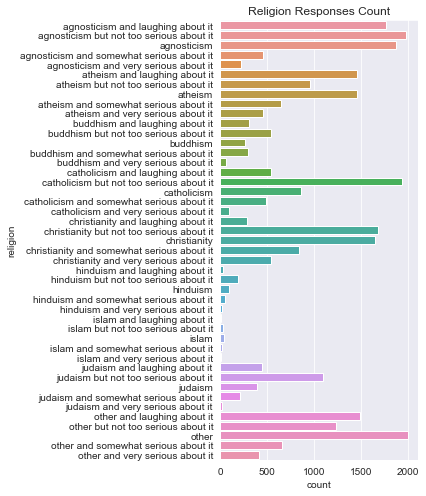

In [24]:
fig = plt.figure(figsize=(6,7))
sns.set_style('darkgrid')
sns.countplot(data=profiles_rel, y='religion')
plt.title('Religion Responses Count')
fig.tight_layout()
plt.savefig('religions.png')

In [25]:
# Count totals for each belief
profiles_rel['belief_overall'] = profiles_rel.religion.str.split().str.get(0)
beliefs_overall = profiles_rel['belief_overall'].value_counts().sort_index().to_frame().reset_index()
beliefs_overall.columns = ['belief', 'count']
beliefs_overall['percent'] = beliefs_overall['count'].apply(lambda x: x/ len(profiles_rel['belief_overall'])*100)

print((beliefs_overall))


         belief  count    percent
0   agnosticism   6307  20.957666
1       atheism   4968  16.508274
2      buddhism   1464   4.864757
3   catholicism   3920  13.025852
4  christianity   4996  16.601316
5      hinduism    375   1.246096
6         islam    110   0.365521
7       judaism   2156   7.164219
8         other   5798  19.266299


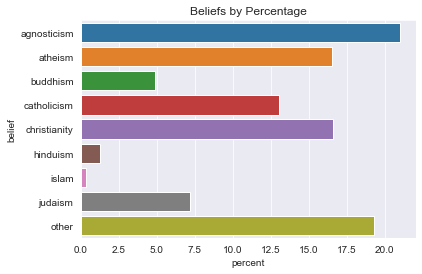

In [26]:
sns.barplot(x=beliefs_overall['percent'], y=beliefs_overall['belief'])
plt.title('Beliefs by Percentage')
plt.savefig('belief_overall.png')
plt.show()

### Drugs

The vast majority of respondents (80%) report that they do not use drugs.

       index     drugs    percent
0      never  0.803250  80.324982
1  sometimes  0.187014  18.701402
2      often  0.009736   0.973616


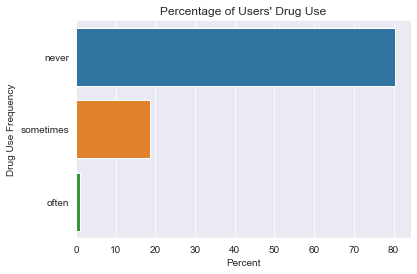

In [27]:
drug_counts = profiles_rel['drugs'].value_counts(normalize=True).reset_index()
drug_counts['percent'] = drug_counts.apply(lambda row: row['drugs']*100, axis =1)
print(drug_counts)

sns.barplot(data=drug_counts, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Drug Use Frequency')
plt.title('Percentage of Users\' Drug Use')
plt.savefig('drug_use.png')

### Drinks

Around 69% of respondents say that they drink 'socially', a little over 10% drink more often, almost 13% drink 'rarely', and almost 8% do not drink at all.

         index    drinks    percent
0     socially  0.691600  69.159965
1       rarely  0.127235  12.723466
2        often  0.088556   8.855586
3   not at all  0.077324   7.732438
4   very often  0.009603   0.960324
5  desperately  0.005682   0.568220


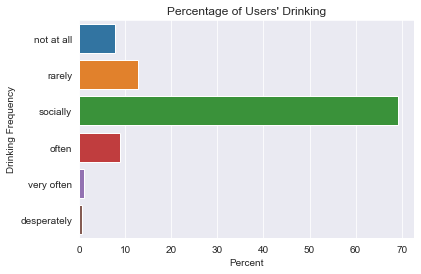

In [28]:
drink_counts = profiles_rel['drinks'].value_counts(normalize=True).reset_index()
drink_counts['percent'] = drink_counts.apply(lambda row: row['drinks']*100, axis =1)
print(drink_counts)

sns.barplot(data=drink_counts, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Drinking Frequency')
plt.title('Percentage of Users\' Drinking')
plt.savefig('drinking.png')

### Smokes

The vast majority of respondents (81%) say that they do not smoke at all.

            index    smokes    percent
0              no  0.810128  81.012826
1       sometimes  0.067655   6.765468
2   when drinking  0.052402   5.240247
3             yes  0.041968   4.196850
4  trying to quit  0.027846   2.784608


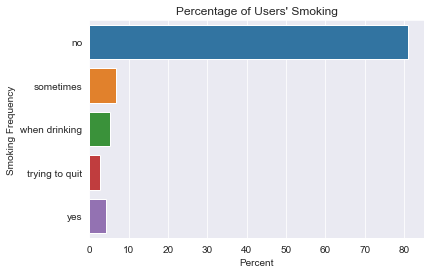

In [29]:
smoke_counts = profiles_rel['smokes'].value_counts(normalize=True).reset_index()
smoke_counts['percent'] = smoke_counts.apply(lambda row: row['smokes']*100, axis =1)
print(smoke_counts)

sns.barplot(data=smoke_counts, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Smoking Frequency')
plt.title('Percentage of Users\' Smoking')
plt.savefig('smoking.png')

### Ethnicity

There are over 200 unique entries in this column, which includes entries describing multiple ethnicities. Following is a count of the fully unique ethnicities in the list. There are 9 fully unique, individual ethnicities in the list. 


In [30]:
# Use Counter to find how often each ethnicity is mentioned in the unique list.
from collections import Counter

tokens = (' '.join(unique_list('ethnicity'))).split()
print(Counter(tokens))


Counter({'asian,': 99, 'hispanic': 99, '/': 99, 'native': 94, 'black,': 93, 'other': 92, 'american,': 89, 'pacific': 81, 'latin,': 71, 'islander,': 68, 'middle': 64, 'white': 62, 'eastern,': 62, 'indian,': 55, 'white,': 52, 'latin': 28, 'islander': 13, 'indian': 10, 'american': 5, 'black': 4, 'eastern': 2, 'asian': 1})


Since there are a very large number of ethnicities, group all multiethnicities with less than 100 users into a new group called `other_2`. This reduces the number of unique groups to 20 which is much more manageable.

The plots show that the vast majority of users are self-described as 'white', followed far behind by 'asian', 'hispanic/latin', and 'black'. 

In [31]:
# To reduce the number of unique ethnicities, first group any ethnicities with counts 100 or less into the group 'other_2'. 
profiles_eth = profiles.dropna(subset=['ethnicity']).copy()
print(profiles_eth.shape)
# print(profiles_eth)

# profiles_eth['ethnicity'] = pd.Categorical(profiles_eth['ethnicity'], ordered=True)
ethnicity_counts = profiles_eth['ethnicity'].value_counts()

print(ethnicity_counts)

mask = profiles_eth['ethnicity'].isin(ethnicity_counts[ethnicity_counts < 101].index)
# print(profiles_eth)
# print(mask)
profiles_eth[mask] = 'other_2'
ethnicity_count_sort = profiles_eth.ethnicity.value_counts().reset_index()
print(ethnicity_count_sort)

#     # Note- two methods to get the count of a specific value in a column. Second method is much faster.
#     # %timeit profiles_eth[profiles_eth['ethnicity'] == 'white']['ethnicity'].count()
#     # %timeit profiles_eth['ethnicity'].value_counts()['white']


num_white = profiles_eth['ethnicity'].value_counts()['white']
# num_other_2 = profiles_eth['ethnicity'].value_counts()['other_2']
print(num_white)
# print(num_other_2)



(54266, 31)
white                                                                        32831
asian                                                                         6134
hispanic / latin                                                              2823
black                                                                         2008
other                                                                         1706
                                                                             ...  
middle eastern, black, native american, indian                                   1
black, native american, indian                                                   1
asian, native american, indian, pacific islander, hispanic / latin, white        1
asian, black, pacific islander, other                                            1
middle eastern, black, native american, indian, hispanic / latin, white          1
Name: ethnicity, Length: 217, dtype: int64
                             ind

Text(0.5, 1.0, 'Count by Ethnicity')

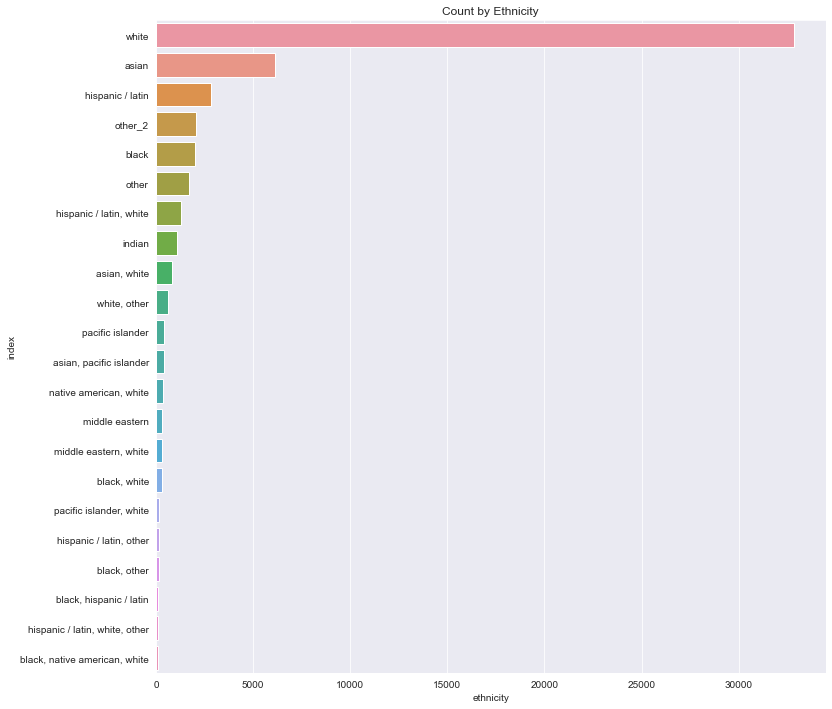

In [32]:
plt.figure(figsize=(12,12))
sns.barplot(x=ethnicity_count_sort['ethnicity'], y=ethnicity_count_sort['index'])
plt.title('Count by Ethnicity')
# plt.savefig('ethinicity.png')

As an alternate analysis, for users stating multiple ethnicities, assign the user to the first group they listed. From the plot below, the alternate analysis does not change the results substantially: again, 'white', 'asian', 'hispanic', and 'black' are roughly in the same proportions as before.

              index  first_eth
0             white      33472
1             asian       8205
2  hispanic / latin       4379
3             black       3071
4             other       1706
5            indian       1196
6    middle eastern        811
7  pacific islander        717
8   native american        709


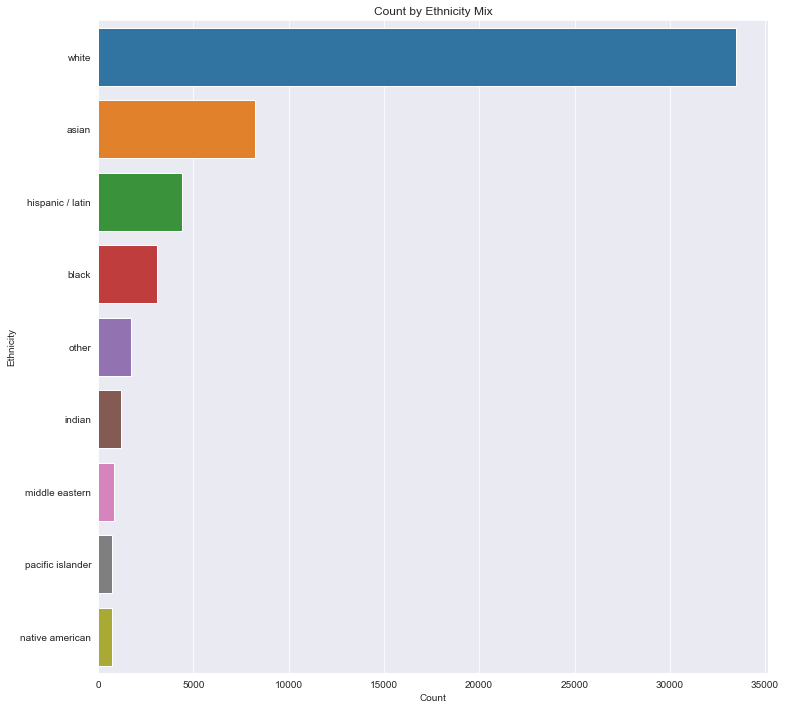

In [33]:
# Now check mixed ethnicity: for single ethnicity, keep as is. For multiethnicity, keep first entry then add 'mix'

profiles_eth2 = profiles.dropna(subset=['ethnicity']).copy()

profiles_eth2['first_eth'] = profiles_eth2.apply(lambda row: (row['ethnicity'].split(','))[0], axis = 1)
eth_count_sort = (profiles_eth2['first_eth'].value_counts().reset_index())
print(eth_count_sort)
plt.figure(figsize=(12,12))
sns.barplot(x=eth_count_sort['first_eth'], y=eth_count_sort['index'])
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Count by Ethnicity Mix')
plt.savefig('ethinicity.png')
    
# profiles_eth2['first_eth'] = profiles_eth2.apply(lambda row: row['ethnicity'] if len(row['ethnicity'].split(',')) == 1 \
#                                                else (row['ethnicity'].split(','))[0] + ' mix', axis=1)
# eth_count_sort = (profiles_eth2['first_eth'].value_counts().reset_index())
# print(eth_count_sort)
# plt.figure(figsize=(12,12))
# sns.barplot(x=eth_count_sort['first_eth'], y=eth_count_sort['index'])
# plt.title('Count by Ethnicity Mix')
# # plt.savefig('ethinicity.png')


### Education

A significant number of respondents (57%) are enrolled in or graduated from college or univeristy. Another 20% are enrolled in or graduated from a master program. 

                                index  education    percent
23         dropped out of high school   0.001913   0.191305
25             working on high school   0.001632   0.163172
24                        high school   0.001801   0.180052
5          graduated from high school   0.026783   2.678270
19    dropped out of two-year college   0.003582   0.358228
8         working on two-year college   0.020143   2.014329
17                   two-year college   0.004164   0.416370
4     graduated from two-year college   0.028715   2.871451
9   dropped out of college/university   0.018662   1.866162
2       working on college/university   0.107131  10.713080
11                 college/university   0.015023   1.502307
0   graduated from college/university   0.449360  44.936044
20     dropped out of masters program   0.002626   0.262575
3          working on masters program   0.031565   3.156533
21                    masters program   0.002551   0.255073
1      graduated from masters program   

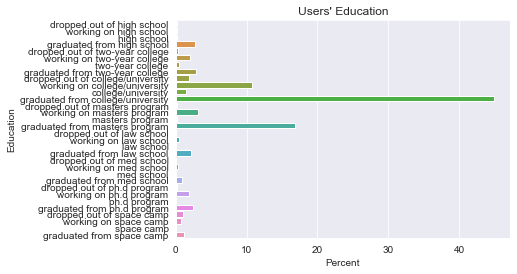

In [34]:

profiles['education'] = pd.Categorical(profiles['education'],\
                        ['dropped out of high school', 'working on high school', 'high school', 'graduated from high school', \
                         'dropped out of two-year college', 'working on two-year college', 'two-year college', 'graduated from two-year college', \
                         'dropped out of college/university', 'working on college/university', 'college/university', 'graduated from college/university', \
                         'dropped out of masters program', 'working on masters program', 'masters program', 'graduated from masters program', \
                         'dropped out of law school', 'working on law school', 'law school', 'graduated from law school', \
                         'dropped out of med school', 'working on med school', 'med school', 'graduated from med school', \
                         'dropped out of ph.d program', 'working on ph.d program', 'ph.d program', 'graduated from ph.d program', \
                         'dropped out of space camp', 'working on space camp', 'space camp', 'graduated from space camp'], ordered=True)
profiles_ed = profiles['education'].value_counts(normalize=True).reset_index()
profiles_ed['percent'] =  profiles_ed.apply(lambda row: row['education']*100, axis =1)
print(profiles_ed.sort_values(by= 'index'))

sns.barplot(data=profiles_ed, x='percent', y='index')
plt.xlabel('Percent')
plt.ylabel('Education')
plt.title('Users\' Education')
plt.savefig('education.png')

### Age

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64


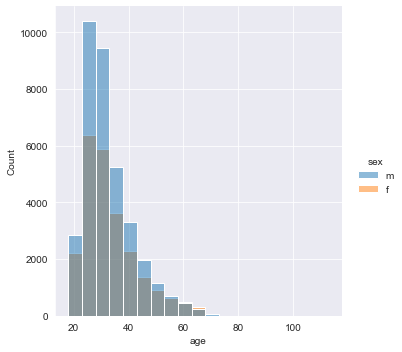

In [35]:
print(profiles['age'].describe())
sns.displot(data=profiles, x='age',kind='hist', binwidth=5, hue='sex')

## Body Type

Data below shows that at large majority of users call their body type 'average' (26-27%) or 'fit' (21-25%). For males, an
additional 28.6% call their body type 'athletic' while for females a similar percentage call their body type 'athletic' or 'curvy' (28.8%). Females were more likely to use the terms 'curvy' or 'full-figured' and males were more likely to use the term 'athletic'.

In [36]:
# Drop nulls and then categorize data

profiles_body = profiles.dropna(subset=['body_type']).copy()
profiles_body['body_type'] = pd.Categorical(profiles_body['body_type'], \
                                            ['rather not say', 'skinny', 'thin', 'average', 'fit', 'curvy', 'athletic', \
                                             'jacked', 'a little extra', 'overweight', 'full figured', 'used up'], ordered=True)
print(profiles_body['body_type'].sort_values().value_counts())

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64


In [37]:
body_sex_count = profiles_body.groupby(['body_type', 'sex'])['status'].count().reset_index()
total_male = profiles_body['sex'].value_counts()[0]
total_female = profiles_body['sex'].value_counts()[1]
print(total_male, total_female)
body_sex_count['percent'] = body_sex_count.apply(lambda row: row['status']/total_male*100 if row['sex'] == 'm' else row['status']/total_female*100, axis = 1)
print(body_sex_count)

33236 21414
         body_type sex  status    percent
0   rather not say   f     106   0.495003
1   rather not say   m      92   0.276808
2           skinny   f     601   2.806575
3           skinny   m    1176   3.538332
4             thin   f    2469  11.529840
5             thin   m    2242   6.745697
6          average   f    5620  26.244513
7          average   m    9032  27.175352
8              fit   f    4431  20.692071
9              fit   m    8280  24.912745
10           curvy   f    3811  17.796768
11           curvy   m     113   0.339993
12        athletic   f    2309  10.782666
13        athletic   m    9510  28.613552
14          jacked   f     129   0.602410
15          jacked   m     292   0.878565
16  a little extra   f     821   3.833940
17  a little extra   m    1808   5.439884
18      overweight   f     145   0.677127
19      overweight   m     299   0.899627
20    full figured   f     870   4.062763
21    full figured   m     139   0.418221
22         used up   f

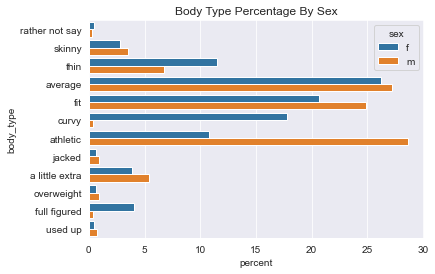

In [38]:
# Plot body type sorted by sex by percent

sns.barplot(x=body_sex_count['percent'], y=body_sex_count['body_type'], hue= body_sex_count['sex'])
plt.title('Body Type Percentage By Sex')
plt.savefig('body_type_sex.png')
plt.show()

## Diet

The diet preference for the vast majority of users is 'anything' (78.4%). A smaller number is 'vegetarian' (14%), 'other' (5%), 'vegan' (2%), 'kosher' (0.3%), and 'halal' (0.2%).

In [39]:
profiles_diet = profiles.dropna(subset=['diet']).copy()


profiles_diet['diet_overall'] = profiles_diet.diet.str.split().str.get(-1)
diet_overall = profiles_diet['diet_overall'].value_counts().sort_index().to_frame().reset_index()
diet_overall.columns = ['diet', 'count']
diet_overall['percent'] = diet_overall['count'].apply(lambda x: x/ len(profiles_diet['diet_overall'])*100)

print((diet_overall.sort_values(by='percent')))


         diet  count    percent
1       halal     77   0.216590
2      kosher    115   0.323479
4       vegan    702   1.974628
3       other   1790   5.035020
5  vegetarian   4986  14.024922
0    anything  27881  78.425361


## Location

The first 50 most cited locations are all in the Bay Area and account for 99.1% of all users. I.e. this data represents OkCupid users that are nearly exclusively from the Bay Area. It is unclear whether the `location` data will provide useful information to the machine learning model.

In [40]:

counts_loc = (profiles['location'].value_counts().head(50).reset_index())
print(counts_loc)
count_loc = counts_loc['location'].sum()
print('The first 50 most-cited locations are all in the Bay Area and account for '\
      + str(count_loc) + ' of 59946 users, or ' + str(round((count_loc/59946*100),1)) + '% of all users.')


                              index  location
0         san francisco, california     31064
1               oakland, california      7214
2              berkeley, california      4212
3             san mateo, california      1331
4             palo alto, california      1064
5               alameda, california       910
6            san rafael, california       755
7               hayward, california       747
8            emeryville, california       738
9          redwood city, california       693
10            daly city, california       681
11          san leandro, california       651
12         walnut creek, california       644
13              vallejo, california       558
14           menlo park, california       479
15             richmond, california       424
16  south san francisco, california       416
17        mountain view, california       384
18               novato, california       369
19           burlingame, california       361
20        pleasant hill, californi

## Pets

Among respondents, 21.2% has at least one dog and 18.2% has at least one cat. These number include 3.7% that have both. Only 1.4%  express a dislike of dogs, and 7.2% express a dislike of cats. 

The percentage of responses that include "has dogs" is 21.2%
The percentage of responses that include "has cats" is 18.2%
The percentage of responses that include "has dogs and has cats" is 3.7%
The percentage of responses that include "dislikes dogs" is 1.4%
The percentage of responses that include "dislikes cats" is 7.2%
                     pet_preference     ratio    percent
12                    dislikes cats  0.003048   0.304809
14                    dislikes dogs  0.001099   0.109931
11  dislikes dogs and dislikes cats  0.004897   0.489694
1                        likes dogs  0.180487  18.048720
5      likes dogs and dislikes cats  0.050693   5.069332
0         likes dogs and likes cats  0.370119  37.011868
3                          has dogs  0.103285  10.328545
9        has dogs and dislikes cats  0.013791   1.379138
4           has dogs and likes cats  0.058289   5.828857
6             has dogs and has cats  0.036827   3.682698
2           likes dogs and has cats  0.107758  1

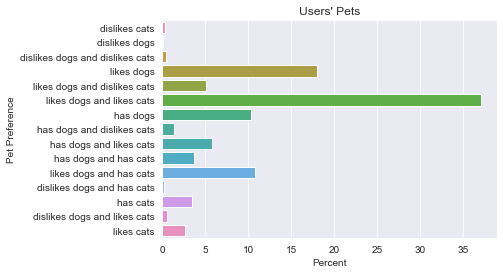

In [41]:

profiles['pets'] = pd.Categorical(profiles['pets'],\
                        ['dislikes cats', 'dislikes dogs', 'dislikes dogs and dislikes cats', 'likes dogs', \
                         'likes dogs and dislikes cats', 'likes dogs and likes cats', 'has dogs', \
                         'has dogs and dislikes cats', 'has dogs and likes cats', 'has dogs and has cats',\
                         'likes dogs and has cats', 'dislikes dogs and has cats', 'has cats', \
                         'dislikes dogs and likes cats', 'likes cats'], ordered=True)
profiles_pets = profiles['pets'].value_counts(normalize=True).reset_index()
profiles_pets.rename(columns = {'index':'pet_preference', 'pets': 'ratio'}, inplace=True)
profiles_pets['percent'] =  profiles_pets.apply(lambda row: row['ratio']*100, axis =1)

pet_percent_count = 0
pet_phrases = ['has dogs', 'has cats', 'has dogs and has cats', 'dislikes dogs', 'dislikes cats']
for phrase in pet_phrases:
    for i in range(len(profiles_pets)):
        if (profiles_pets['pet_preference'][i].__contains__(phrase)):
            pet_percent_count += profiles_pets['percent'][i]
    print(f'The percentage of responses that include "{phrase}" is {round(pet_percent_count,1)}%')
    pet_percent_count = 0


print(profiles_pets.sort_values(by= 'pet_preference'))

sns.barplot(data=profiles_pets, x='percent', y='pet_preference')
plt.xlabel('Percent')
plt.ylabel('Pet Preference')
plt.title('Users\' Pets')
plt.savefig('pets.png')

##  Natural Language Processing

Use scikit-learn's bag-of-words and Naive Bayes classifier to determine the author of a writing selection.

- **Goal** There are 10 essay-type answers that each user submitted when creating their profile. The goal will be to select 10 users at random and use a random selection of 8 of their essay answers in order to train the model. Then given  9 and 10th essays, see how accurately the model can guess the correct user.
- **Data** As noted, data will be `essay0` through `essay9` from 10 random users. 
- **Analysis** The analysis will use scikit-learn's bag-of-words and Naive Bayes classifier. The 10 random users will need to have answered all 10 essay questions so that we don't inadvertently have NaNs to clog up the model. 

In [42]:
# Copy profiles dataset, and drop all rows with any null values in any of the essay questions. 

profiles_essays = profiles[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', \
                            'essay5', 'essay6', 'essay7', 'essay8', 'essay9',]].dropna()

# Check remaining users. NOTE- from .shape, 29866 users answered all ten essays. OK to proceed. 
print(profiles_essays.shape)

(29866, 10)


In [43]:
# Select 10 random users using built-in `.sample` method, then for each select 9 essays to train the model. We might be 
# able to use .sample again to select random columns, but instead use random indexes so that we can keep track. Use the
# remaining essay to predict who the author is.


training_essays = []
test_essays = []
user_labels = []
test_labels = []
ten_users = profiles_essays.sample(n=10).reset_index(drop=True)
print(ten_users.shape)
for i in range(len(ten_users)):
    rand_index = np.random.randint(10, size = 1)
#     if rand_index[0] == rand_index[1]:
#         rand_index[1] = (rand_index[0] + 3)%10
    
    for j in range(len(ten_users.columns)):        
        if j not in rand_index:
            training_essays.append(ten_users.iloc[i, j])
            user_labels.append(i)
        else:
            test_essays.append(ten_users.iloc[i, j])
            test_labels.append(i)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

bow_vectorizer = CountVectorizer()
user_vectors = bow_vectorizer.fit_transform(training_essays)

user_classifier = MultinomialNB()
user_classifier.fit(user_vectors, user_labels)

correct = 0
for i in range(10):
    test_vector = bow_vectorizer.transform([test_essays[i]])
    prediction = user_classifier.predict(test_vector)
    if prediction == i:
        print(f'For index {i} predicted {prediction}: MATCH!!!')
        correct += .1        
    else:
        print(f'For index {i} predicted {prediction}')
    
print(f'Correct ratio is: {correct}')

(10, 10)
For index 0 predicted [0]: MATCH!!!
For index 1 predicted [2]
For index 2 predicted [2]: MATCH!!!
For index 3 predicted [7]
For index 4 predicted [4]: MATCH!!!
For index 5 predicted [7]
For index 6 predicted [7]
For index 7 predicted [2]
For index 8 predicted [7]
For index 9 predicted [2]
Correct ratio is: 0.30000000000000004


### Natural Language Processing

- **Conclusions** After running the classifier ten times, the classifier consistently made the correct classification an average of 1.8 times out of 10, which is *slightly* better performance than random guessing. Of course, for better classifications the solution would be to train the model with far more data than the ten essays here. 

## Machine Learning

### Check and Prepare Data

Check data for null values

In [44]:
profiles.isnull().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [45]:
print(profiles['essay7'][999])

nan


In [46]:
print(profiles['essay7'][998])

nan
